# IPL data Analysis
### Dataset: https://www.kaggle.com/patrickb1912/ipl-complete-dataset-20082020
### @SahaAbhisek

In [1]:
!ls

'IPL Ball-by-Ball 2008-2020.csv'      'IPL Matches 2008-2020.csv'
'IPL Ball-by-Ball 2008-2020.csv.zip'   IPL_data_analysis.ipynb


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

In [3]:
match_data = pd.read_csv('IPL Matches 2008-2020.csv')
ball_data = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [4]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [6]:
match_data.shape

(816, 17)

In [7]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [8]:
print("Total Number of Matches: ", match_data.shape[0])

Total Number of Matches:  816


In [9]:
print("Teams participated: ", match_data['team1'].unique())

Teams participated:  ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [10]:
print("Matches held in cities: ", match_data['city'].unique())

Matches held in cities:  ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']


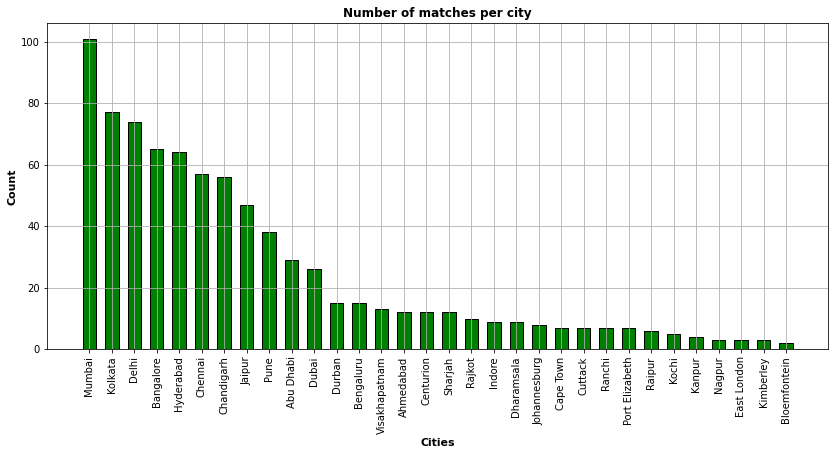

In [11]:
plt.figure(figsize=(14,6))
plt.bar(match_data['city'].value_counts().index, match_data['city'].value_counts(),
        width=0.6, color='green', edgecolor='k')

#match_data['city'].value_counts().plot(kind='bar')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Cities", fontsize=11, fontweight='bold')
plt.ylabel("Count", fontsize=11, fontweight='bold')
plt.title("Number of matches per city", fontweight='bold')
plt.grid()
plt.show()

## Create Season column

In [12]:
match_data['season'] = pd.DatetimeIndex(match_data['date']).year

In [13]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


# Maximum Mathces won in each season

In [14]:
# Number of matches in each season
match_data.groupby('season')['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: id, dtype: int64

In [15]:
match_data['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [16]:
match_data.groupby(['season','winner'])['winner'].count().sort_values(ascending=False)[:16].sort_index()

season  winner               
2008    Rajasthan Royals         13
2010    Mumbai Indians           11
2011    Chennai Super Kings      11
2012    Delhi Daredevils         11
        Kolkata Knight Riders    12
        Mumbai Indians           10
2013    Chennai Super Kings      12
        Mumbai Indians           13
        Rajasthan Royals         11
2014    Kings XI Punjab          12
        Kolkata Knight Riders    11
2016    Sunrisers Hyderabad      11
2017    Mumbai Indians           12
2018    Chennai Super Kings      11
2019    Mumbai Indians           11
2020    Mumbai Indians           11
Name: winner, dtype: int64

In [24]:
print('2009: ',match_data[match_data['season']==2009]['winner'].value_counts()[:1])
print('2015: ',match_data[match_data['season']==2015]['winner'].value_counts()[:1])

2009:  Delhi Daredevils    10
Name: winner, dtype: int64
2015:  Mumbai Indians    10
Name: winner, dtype: int64


In [25]:
ball_data.shape

(193468, 18)

In [26]:
season_data = match_data[['id', 'season']].merge(ball_data, how='left', on='id').drop('id', axis=1)
season_data.head()

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [27]:
season_data.shape

(193468, 18)

In [28]:
runs_per_season = season_data.groupby('season')['total_runs'].sum().reset_index()

runs_per_season

,season,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
...,...,...
8,2016,18862
9,2017,18769
10,2018,19901
11,2019,19400


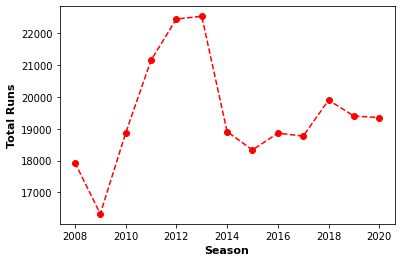

In [29]:
plt.plot(runs_per_season['season'], runs_per_season['total_runs'], 'ro--')
plt.xlabel('Season', fontsize=11, fontweight='bold')
plt.ylabel('Total Runs', fontsize=11, fontweight='bold')
plt.show()

In [30]:
# Total Matches in each season
num_match_per_season = match_data.groupby('season')['id'].count().reset_index()
num_match_per_season.rename(columns={'id':'matches'}, inplace=True)
num_match_per_season

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
...,...,...
8,2016,60
9,2017,59
10,2018,60
11,2019,60


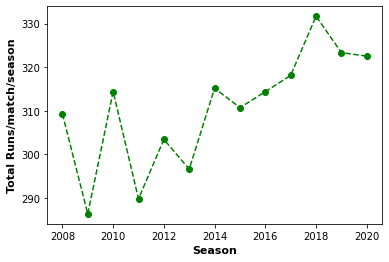

In [31]:
# Runs per match in each season
plt.plot(runs_per_season['season'], runs_per_season['total_runs']/num_match_per_season['matches'], 'go--')
plt.xlabel('Season', fontsize=11, fontweight='bold')
plt.ylabel('Total Runs/match/season', fontsize=11, fontweight='bold')
plt.show()

In [32]:
# Tosses won by each team
toss_won = match_data['toss_winner'].value_counts()
toss_won

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Rajasthan Royals                87
Royal Challengers Bangalore     87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Delhi Capitals                  20
Pune Warriors                   20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

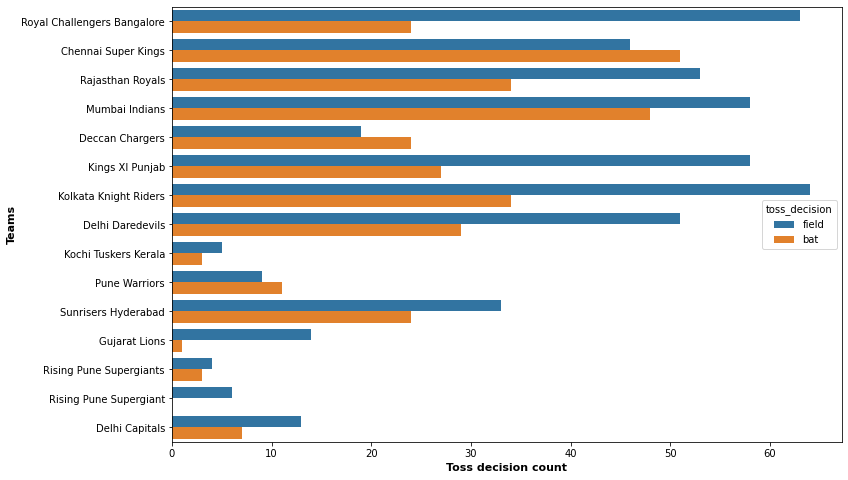

In [33]:
# Toss decission of all teams
plt.figure(figsize=(12,8))
sns.countplot(data=match_data, hue='toss_decision', y='toss_winner')
plt.yticks(fontsize=10)
plt.xlabel('Toss decision count', fontsize=11, fontweight='bold')
plt.ylabel('Teams', fontsize=11, fontweight='bold')
plt.show()

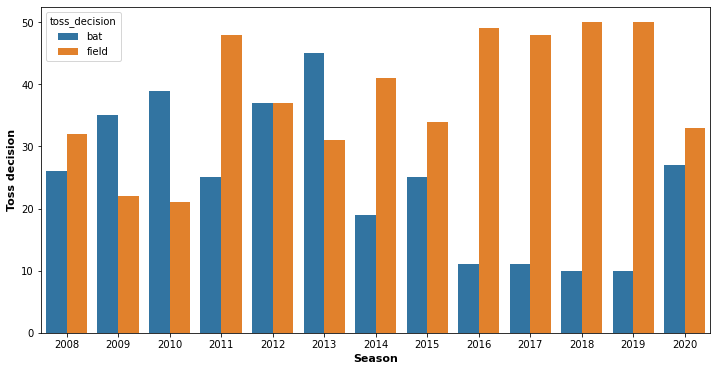

In [34]:
# Toss decision across season
plt.figure(figsize=(12,6))
sns.countplot(data=match_data, x='season', hue='toss_decision', hue_order=['bat', 'field'])# facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
plt.xticks(fontsize=10)
plt.xlabel('Season', fontsize=11, fontweight='bold')
plt.ylabel('Toss decision', fontsize=11, fontweight='bold')
plt.show()

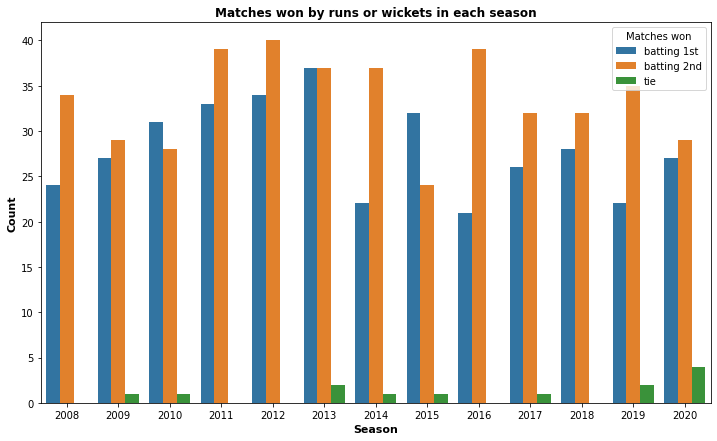

In [35]:
# count Matches won by runs or wickets in each season
plt.figure(figsize=(12,7))
sns.countplot(data=match_data, hue='result', x='season')
plt.legend(title='Matches won', loc='best', labels=['batting 1st', 'batting 2nd', 'tie'])
plt.xticks(fontsize=10)
plt.xlabel('Season', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.title("Matches won by runs or wickets in each season", fontweight='bold')
plt.show()

In [36]:
import warnings
warnings.filterwarnings(action='ignore')

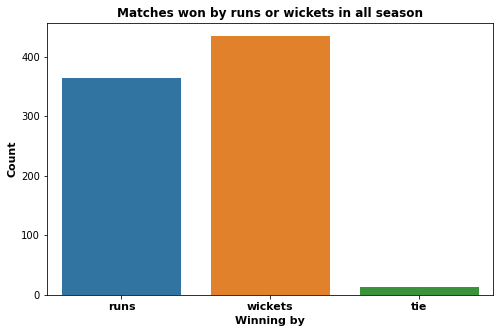

In [37]:
# count Matches won by runs or wickets in all season
plt.figure(figsize=(8,5))
sns.countplot('result', data=match_data, x='season')
plt.xticks(fontsize=11, fontweight='bold')
plt.xlabel('Winning by', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.title("Matches won by runs or wickets in all season", fontweight='bold')
plt.show()

In [38]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


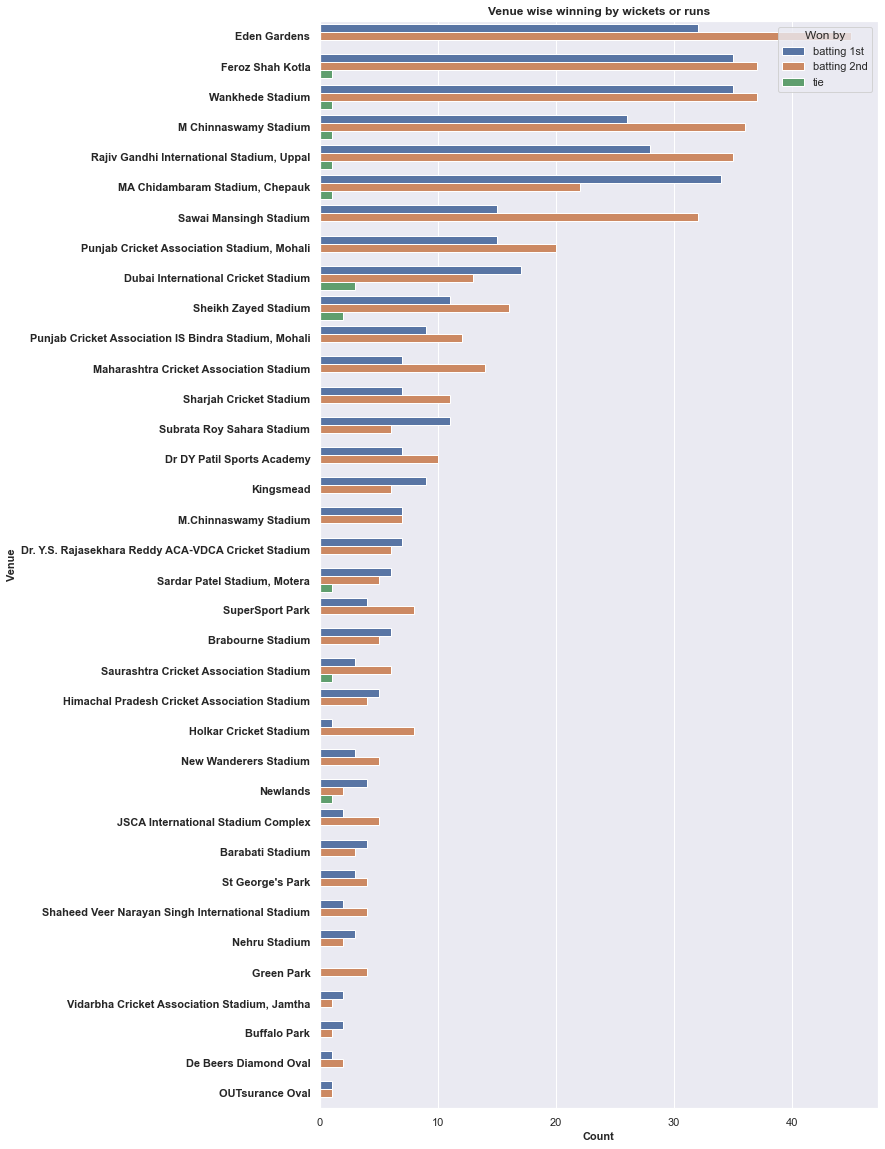

In [39]:
# Venue wise winning by wickets or runs
sns.set(style='darkgrid')
plt.figure(figsize=(10,20))
sns.countplot(data=match_data, hue='result', y='venue', order=match_data['venue'].value_counts().index)
plt.legend(title='Won by', loc='upper right', labels=['batting 1st', 'batting 2nd', 'tie'])

plt.yticks(fontsize=11, fontweight='bold')
plt.xlabel('Count', fontsize=11, fontweight='bold')
plt.ylabel('Venue', fontsize=11, fontweight='bold')
plt.title("Venue wise winning by wickets or runs", fontweight='bold')
plt.show()

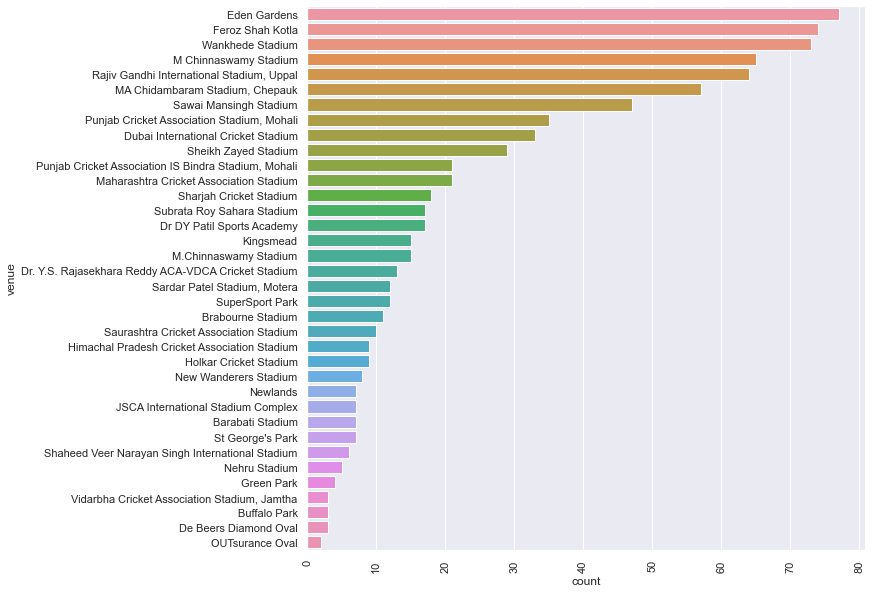

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(y=match_data['venue'], order=match_data['venue'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [41]:
# team that won maximum time chasing
match_data[match_data['result']=='wickets']['winner'].value_counts()

Kolkata Knight Riders          57
Mumbai Indians                 56
Chennai Super Kings            53
Rajasthan Royals               51
Royal Challengers Bangalore    51
Kings XI Punjab                45
Delhi Daredevils               42
Sunrisers Hyderabad            31
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                  8
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [42]:
# team that won maximum time batting first
match_data[match_data['result']=='runs']['winner'].value_counts()

Mumbai Indians                 62
Chennai Super Kings            53
Kolkata Knight Riders          41
Kings XI Punjab                40
Royal Challengers Bangalore    38
Sunrisers Hyderabad            34
Rajasthan Royals               28
Delhi Daredevils               25
Deccan Chargers                18
Delhi Capitals                  9
Pune Warriors                   6
Rising Pune Supergiant          5
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

In [43]:
# best ground for chasing
match_data.venue[match_data['result']=='wickets'].mode()

0    Eden Gardens
dtype: object

In [44]:
# best ground for setting targets
match_data.venue[match_data['result']=='runs'].mode()

0    Feroz Shah Kotla
1    Wankhede Stadium
dtype: object

In [45]:
# Ground where teams won maximum times after winning the toss
match_data[match_data.winner=='Mumbai Indians'][match_data.toss_winner=='Mumbai Indians'].venue.mode()

0    Wankhede Stadium
dtype: object

In [46]:
match_data[match_data.winner=='Kolkata Knight Riders'][match_data.toss_winner=='Kolkata Knight Riders'].venue.mode()

0    Eden Gardens
dtype: object

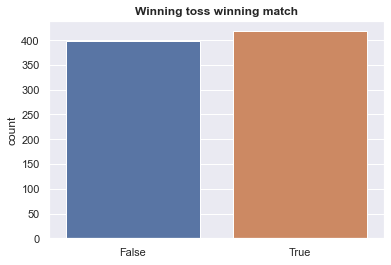

In [47]:
# Toss won match won
twmw = match_data.toss_winner==match_data.winner

sns.countplot(twmw)
plt.title("Winning toss winning match", fontweight='bold')
plt.show()

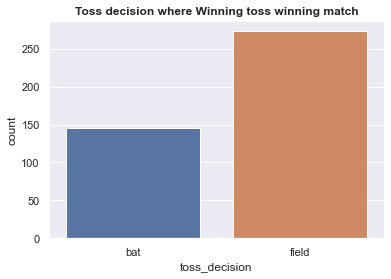

In [48]:
# choosing batting or bowling and win # first the team has to win the toss and win the match

twmw_toss_decision = match_data[match_data.toss_winner==match_data.winner]['toss_decision']

sns.countplot(twmw_toss_decision)
plt.title("Toss decision where Winning toss winning match", fontweight='bold')
plt.show()

The team which decided to field first after winning the toss, has won maximum number of times

In [49]:
# Match won by maximum runs
won_by_max_runs = match_data[match_data.result=='runs']['result_margin'].max()
won_by_max_runs

146.0

In [50]:
# Details of the match
match_data[match_data.result_margin==won_by_max_runs]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [51]:
match_data[match_data['result']=='runs']['result_margin']

0      140.0
1       33.0
7        6.0
9       66.0
14      13.0
       ...  
804     82.0
806     69.0
807     13.0
812     57.0
814     17.0
Name: result_margin, Length: 364, dtype: float64

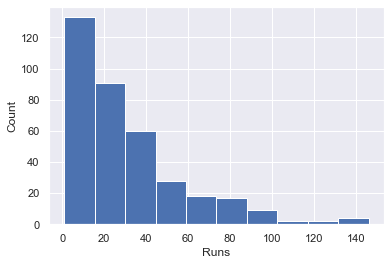

In [52]:
plt.hist(match_data[match_data['result']=='runs']['result_margin'], bins=10)
plt.xlabel("Runs")
plt.ylabel("Count")
plt.show()

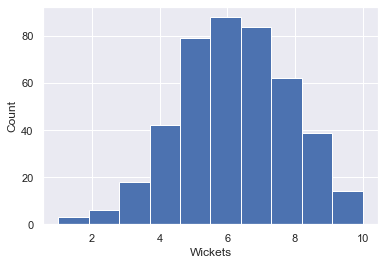

In [53]:
plt.hist(match_data[match_data['result']=='wickets']['result_margin'], bins=10)
plt.xlabel("Wickets")
plt.ylabel("Count")
plt.show()

In [54]:
season_data.shape

(193468, 18)

In [55]:
season_data.isnull().sum()

season                   0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [56]:
season_data.head()

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [57]:
# Top scorer 20 batsmen
season_data.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False)[:20]

batsman
V Kohli           5878
SK Raina          5368
DA Warner         5254
RG Sharma         5230
S Dhawan          5197
AB de Villiers    4849
CH Gayle          4772
MS Dhoni          4632
RV Uthappa        4607
G Gambhir         4217
AM Rahane         3933
SR Watson         3874
KD Karthik        3823
AT Rayudu         3659
MK Pandey         3268
YK Pathan         3204
KA Pollard        3023
BB McCullum       2880
PA Patel          2848
Yuvraj Singh      2750
Name: batsman_runs, dtype: int64

In [58]:
season_data['dismissal_kind'].unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

# wicket details

In [84]:
out_by_bowler = season_data[['bowler', 'batsman', 'dismissal_kind']][season_data.is_wicket==1][season_data['dismissal_kind']!='run out'][season_data['dismissal_kind']!='obstructing the field'].reset_index().drop('index',axis=1)
out_by_bowler

,bowler,batsman,dismissal_kind
0,JH Kallis,RT Ponting,caught
1,AA Noffke,DJ Hussey,caught
2,Z Khan,SC Ganguly,caught
3,SC Ganguly,MV Boucher,caught
4,AB Agarkar,B Akhil,caught
...,...,...,...
8595,A Nortje,HH Pandya,caught
8596,NM Coulter-Nile,AR Patel,caught
8597,TA Boult,MP Stoinis,caught
8598,TA Boult,AM Rahane,caught


In [85]:
#Most Number of wickets by bowlers top 20
out_by_bowler['bowler'].value_counts()[:20]

SL Malinga         170
A Mishra           160
PP Chawla          156
DJ Bravo           153
Harbhajan Singh    150
R Ashwin           138
B Kumar            136
SP Narine          127
YS Chahal          121
UT Yadav           119
RA Jadeja          114
JJ Bumrah          109
Sandeep Sharma     109
A Nehra            106
R Vinay Kumar      105
Z Khan             103
DW Steyn            97
SR Watson           92
MM Sharma           92
RP Singh            90
Name: bowler, dtype: int64

In [86]:
out_by_bowler['dismissal_kind'].value_counts()

caught               5743
bowled               1700
lbw                   571
stumped               294
caught and bowled     269
hit wicket             12
retired hurt           11
Name: dismissal_kind, dtype: int64

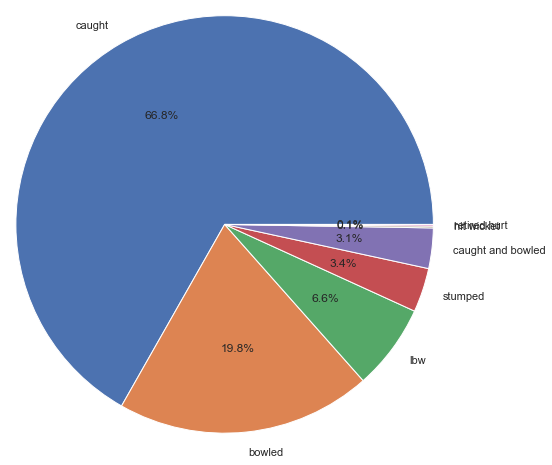

In [87]:
# Dismissal kind in IPL
plt.figure(figsize=(8,8))
plt.pie(out_by_bowler['dismissal_kind'].value_counts(),
        labels=out_by_bowler['dismissal_kind'].value_counts().index,
        autopct='%1.1f%%',
        labeldistance=1.1,
        radius=1.2
       )
plt.show()

In [107]:
# Batsmen getting out most number of times
out_by_bowler[out_by_bowler['batsman']=='V Kohli'].groupby(['batsman','bowler'])['batsman'].count().sort_index(ascending=False)

batsman  bowler        
V Kohli  Z Khan            2
         WPUJC Vaas        1
         VRV Singh         1
         UT Yadav          2
         TG Southee        1
                          ..
         AB Dinda          2
         A Symonds         1
         A Nehra           6
         A Mishra          2
         A Ashish Reddy    2
Name: batsman, Length: 95, dtype: int64

In [108]:
kohli_df = season_data[season_data['batsman']=='V Kohli']
kohli_df.head()

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
211,2008,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
212,2008,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,0,0,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders
213,2008,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
216,2008,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
217,2008,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [112]:
# Total Runs by Kohli
print("Total Runs scored by Kohli: ", kohli_df['batsman_runs'].sum() )

Total Runs scored by Kohli:  5878


In [114]:
# Number of ways Kohli got out
print("Number of ways Kohli got out:\n", kohli_df['dismissal_kind'].value_counts())

Number of ways Kohli got out:
 caught               105
bowled                30
run out               15
lbw                    7
stumped                3
caught and bowled      3
Name: dismissal_kind, dtype: int64


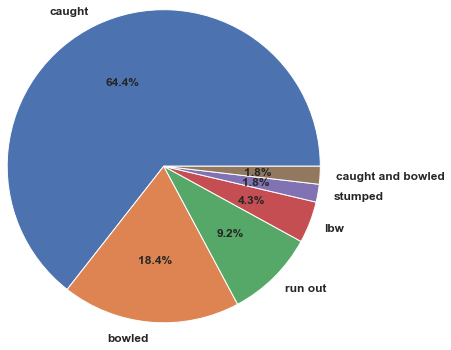

In [124]:
plt.pie(kohli_df['dismissal_kind'].value_counts(),
       labels=kohli_df['dismissal_kind'].value_counts().index,
       autopct='%1.1f%%',
       labeldistance=1.1,
       radius=1.8,
       textprops={'fontsize':12, 'fontweight': 'bold'})
plt.yticks(fontsize=12)
plt.show()

In [133]:
# Runs distribution of Kohli
print("Runs distribution of Kohli: \n", kohli_df['batsman_runs'].value_counts().sort_index() )

Runs distribution of Kohli: 
 0    1625
1    1919
2     346
3      13
4     504
6     202
Name: batsman_runs, dtype: int64


## Runs scored in each season by kohli

In [156]:
# Season wise runs of kohli
print("Runs scored in each season by kohli")
kohli_df.groupby('season')['batsman_runs'].sum()

Runs scored in each season by kohli


season
2008    165
2009    246
2010    307
2011    557
2012    364
2013    634
2014    359
2015    505
2016    973
2017    308
2018    530
2019    464
2020    466
Name: batsman_runs, dtype: int64

In [157]:
kohli_runs =  kohli_df.groupby('season', as_index=False).agg({'batsman_runs':'count'}).rename(columns={'batsman_runs':'Total Runs'})
kohli_runs

,season,Total Runs
0,2008,168
1,2009,225
2,2010,216
3,2011,473
4,2012,333
...,...,...
8,2016,655
9,2017,257
10,2018,385
11,2019,332


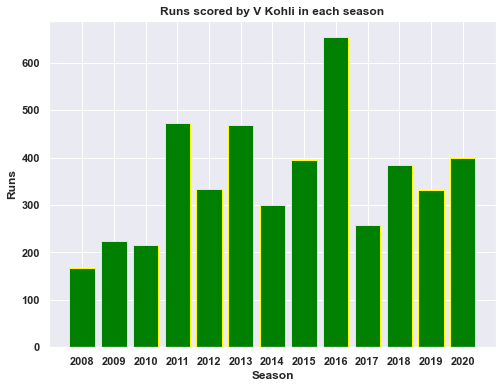

In [171]:
plt.figure(figsize=(8,6))
plt.bar(kohli_runs['season'], kohli_runs['Total Runs'], color='green', edgecolor='yellow')
plt.xticks(np.arange(2008, 2021, 1), fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("Season", fontsize=12, fontweight='bold')
plt.ylabel("Runs", fontsize=12, fontweight='bold')
plt.title("Runs scored by V Kohli in each season", fontweight='bold')
plt.show()

In [175]:
kohli_df['dismissal_kind'].unique()

array([nan, 'bowled', 'caught', 'run out', 'stumped', 'lbw',
       'caught and bowled'], dtype=object)

In [180]:
kohli_out = kohli_df[kohli_df['dismissal_kind']!='run out'][kohli_df['is_wicket']==1]
kohli_out.head()

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
217,2008,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
856,2008,2,13,4,V Kohli,JH Kallis,A Nehra,0,0,0,0,1,caught,V Kohli,L Ronchi,NaN,Royal Challengers Bangalore,Mumbai Indians
2513,2008,1,9,4,V Kohli,MV Boucher,MM Patel,0,0,0,0,1,caught,V Kohli,M Rawat,NaN,Royal Challengers Bangalore,Rajasthan Royals
3477,2008,2,17,2,V Kohli,P Kumar,JA Morkel,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Chennai Super Kings
4993,2008,2,17,2,V Kohli,CL White,WPUJC Vaas,0,0,0,0,1,caught,V Kohli,DB Ravi Teja,NaN,Royal Challengers Bangalore,Deccan Chargers


In [196]:
# Maximum number of dismissal by a bowler

kohli_out_bowler = kohli_out.groupby('bowler', as_index=False)['is_wicket'].agg('count').rename(columns={'is_wicket':'outs'})
print("Bowler dismissed kohli maximum number of times: \n",
      kohli_out_bowler.sort_values('outs', ascending=False)[:10])

Bowler dismissed kohli maximum number of times: 
             bowler  outs
86  Sandeep Sharma     7
2          A Nehra     6
54  Mohammed Shami     4
23     DS Kulkarni     4
51  MJ McClenaghan     4
76         S Gopal     3
31       JH Kallis     3
32       JJ Bumrah     3
48        M Morkel     3
39      KA Pollard     3


In [214]:
# Maximum number of extra runs given by teams
#season_data.groupby('bowling_team').agg({'extra_runs':'count'})
print("Maximum number of extra runs given by teams: \n",
      season_data.groupby('bowling_team', as_index=False)['extra_runs'].count().sort_values('extra_runs',
                                                                                            ascending=False) )

Maximum number of extra runs given by teams: 
                    bowling_team  extra_runs
8                Mumbai Indians       24453
13  Royal Challengers Bangalore       23024
7         Kolkata Knight Riders       22583
5               Kings XI Punjab       22457
0           Chennai Super Kings       21224
10             Rajasthan Royals       18972
3              Delhi Daredevils       18719
14          Sunrisers Hyderabad       14703
1               Deccan Chargers        9039
9                 Pune Warriors        5394
2                Delhi Capitals        4012
4                 Gujarat Lions        3540
11       Rising Pune Supergiant        1928
12      Rising Pune Supergiants        1615
6          Kochi Tuskers Kerala        1614


### Going back to match data

In [201]:
# Maximum Number of man of the match
print("Maximum Number of man of the match: \n", match_data['player_of_match'].value_counts()[:20])

Maximum Number of man of the match: 
 AB de Villiers    23
CH Gayle          22
RG Sharma         18
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         16
SK Raina          14
G Gambhir         13
V Kohli           13
MEK Hussey        12
AM Rahane         12
V Sehwag          11
KA Pollard        11
AD Russell        11
DR Smith          11
A Mishra          11
AT Rayudu         10
JH Kallis         10
RA Jadeja          9
Name: player_of_match, dtype: int64


In [215]:
season_data

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,2020,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193464,2020,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians
193465,2020,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,0,0,NaN,NaN,NaN,wides,Delhi Capitals,Mumbai Indians
193466,2020,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,0,0,NaN,NaN,NaN,NaN,Delhi Capitals,Mumbai Indians


In [335]:
season_data = match_data[['id', 'season', 'venue']].merge(ball_data, how='left', on='id').drop('id', axis=1)
season_data.head()

,season,venue,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,M Chinnaswamy Stadium,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,M Chinnaswamy Stadium,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,M Chinnaswamy Stadium,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,M Chinnaswamy Stadium,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,M Chinnaswamy Stadium,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [336]:
season_data['dismissal_kind'].unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [337]:
# Creating a dataframe of dismissal by bowlers
out_by_bowler = season_data[(season_data['is_wicket']==1)&(season_data['dismissal_kind']!='run out')&
(season_data['dismissal_kind']!='obstructing the field')&(season_data['dismissal_kind']!='retired hurt')]

# Type of dismissal
out_by_bowler['dismissal_kind'].value_counts()

caught               5743
bowled               1700
lbw                   571
stumped               294
caught and bowled     269
hit wicket             12
Name: dismissal_kind, dtype: int64

In [338]:
# Highest wicket takers across all seasons
out_by_bowler['bowler'].value_counts()[:20]

SL Malinga         170
A Mishra           160
PP Chawla          156
DJ Bravo           153
Harbhajan Singh    150
R Ashwin           138
B Kumar            136
SP Narine          127
YS Chahal          121
UT Yadav           119
RA Jadeja          114
JJ Bumrah          109
Sandeep Sharma     109
A Nehra            106
R Vinay Kumar      105
Z Khan             102
DW Steyn            97
SR Watson           92
MM Sharma           92
RP Singh            90
Name: bowler, dtype: int64

In [339]:
# Season wise highest wicket takers
out_by_bowler.groupby(['season', 'bowler'])['bowler'].count().sort_values().groupby(level=0).tail(1).sort_index()

season  bowler       
2008    Sohail Tanvir    22
2009    RP Singh         23
2010    PP Ojha          21
2011    SL Malinga       28
2012    M Morkel         25
2013    DJ Bravo         32
2014    MM Sharma        23
2015    DJ Bravo         26
2016    B Kumar          23
2017    B Kumar          26
2018    AJ Tye           24
2019    Imran Tahir      26
2020    K Rabada         30
Name: bowler, dtype: int64

In [340]:
# Highest runs scored in each season
season_data.groupby(['season', 'batsman'])['batsman_runs'].count().sort_values().max(level=0)

season
2020    525
2016    655
2010    517
2012    472
2009    409
2011    511
2008    452
2015    455
2013    580
2019    496
2017    462
2014    485
2018    522
Name: batsman_runs, dtype: int64

In [341]:
orange_caps = season_data.groupby(['season',
                                   'batsman'])['batsman_runs'
                                              ].count().sort_values().groupby(level=0).tail(1).sort_index()
orange_caps

season  batsman      
2008    SE Marsh         452
2009    ML Hayden        409
2010    JH Kallis        517
2011    SR Tendulkar     511
2012    CH Gayle         472
2013    MEK Hussey       580
2014    RV Uthappa       485
2015    LMP Simmons      455
2016    V Kohli          655
2017    DA Warner        462
2018    KS Williamson    522
2019    DA Warner        496
2020    KL Rahul         525
Name: batsman_runs, dtype: int64

<BarContainer object of 13 artists>

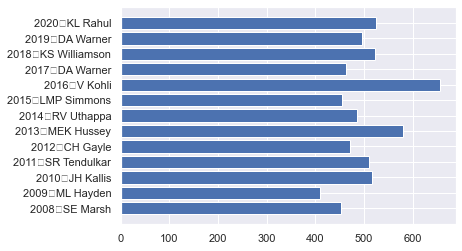

In [342]:
index = [str(i)+'\t'+j for i,j in orange_caps.index]
batsman = [j for i,j in orange_caps.index]
plt.barh(index,orange_caps.values)

In [351]:
#venue wise highest wicket takers
out_by_bowler.groupby(['venue', 'bowler'])['is_wicket'].count().sort_values().groupby(level=0).tail(1).sort_values(ascending=False)

venue                                                 bowler        
Wankhede Stadium                                      SL Malinga        68
Feroz Shah Kotla                                      A Mishra          58
Eden Gardens                                          SP Narine         56
MA Chidambaram Stadium, Chepauk                       R Ashwin          46
Rajiv Gandhi International Stadium, Uppal             B Kumar           36
Sawai Mansingh Stadium                                SK Trivedi        36
M Chinnaswamy Stadium                                 YS Chahal         34
Punjab Cricket Association Stadium, Mohali            PP Chawla         23
M.Chinnaswamy Stadium                                 YS Chahal         17
Punjab Cricket Association IS Bindra Stadium, Mohali  Sandeep Sharma    16
Maharashtra Cricket Association Stadium               Imran Tahir       15
Subrata Roy Sahara Stadium                            R Sharma          13
Dubai International Cricket Sta

In [360]:
# Venue wise highest run getters
season_data.groupby(['venue','batsman'])['batsman_runs'].count().sort_values().groupby(level=0).tail(1).sort_values(ascending=False)

venue                                                 batsman         
M Chinnaswamy Stadium                                 V Kohli             1418
Wankhede Stadium                                      RG Sharma           1324
Rajiv Gandhi International Stadium, Uppal             S Dhawan            1152
Eden Gardens                                          G Gambhir           1148
MA Chidambaram Stadium, Chepauk                       SK Raina            1142
Sawai Mansingh Stadium                                AM Rahane            923
Feroz Shah Kotla                                      SS Iyer              698
Punjab Cricket Association Stadium, Mohali            SE Marsh             649
Subrata Roy Sahara Stadium                            RV Uthappa           378
Maharashtra Cricket Association Stadium               AM Rahane            352
M.Chinnaswamy Stadium                                 AB de Villiers       335
Punjab Cricket Association IS Bindra Stadium, Mohali  KL Rah